In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Game data.csv")

In [3]:
data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [4]:
data.tail()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...
74680,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [5]:
data.columns = ['id', 'game', 'sentiment', 'text' ] # Give the name to each column

In [6]:
data

,id,game,sentiment,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [7]:
data.shape

(74681, 4)

In [8]:
id_types = data['id'].value_counts()
id_types

id
5203    6
6164    6
6141    6
6142    6
6143    6
       ..
4678    6
4679    6
4680    6
4681    6
2401    5
Name: count, Length: 12447, dtype: int64

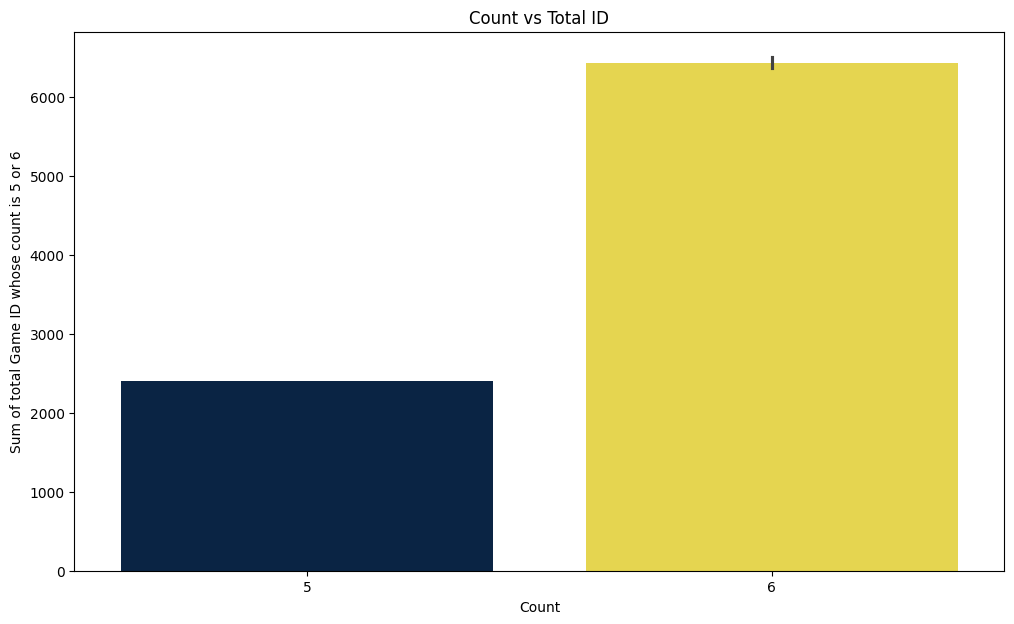

In [26]:
plt.figure(figsize=(12,7))
sns.barplot(y=id_types.index, x=id_types.values, hue = id_types.values, legend = False, palette='cividis')  
plt.xlabel('Count')
plt.ylabel('Sum of total Game ID whose count is 5 or 6')
plt.title('Count vs Total ID')
plt.show()

In [18]:
game_types = data['game'].value_counts()
game_types

game
TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
Amazon                               2316
PlayStation5(PS5)                    2310
HomeDepot                            2310
Cyberpunk2077                        2304
CS-GO                                2304
GrandTheftAuto(GTA)          

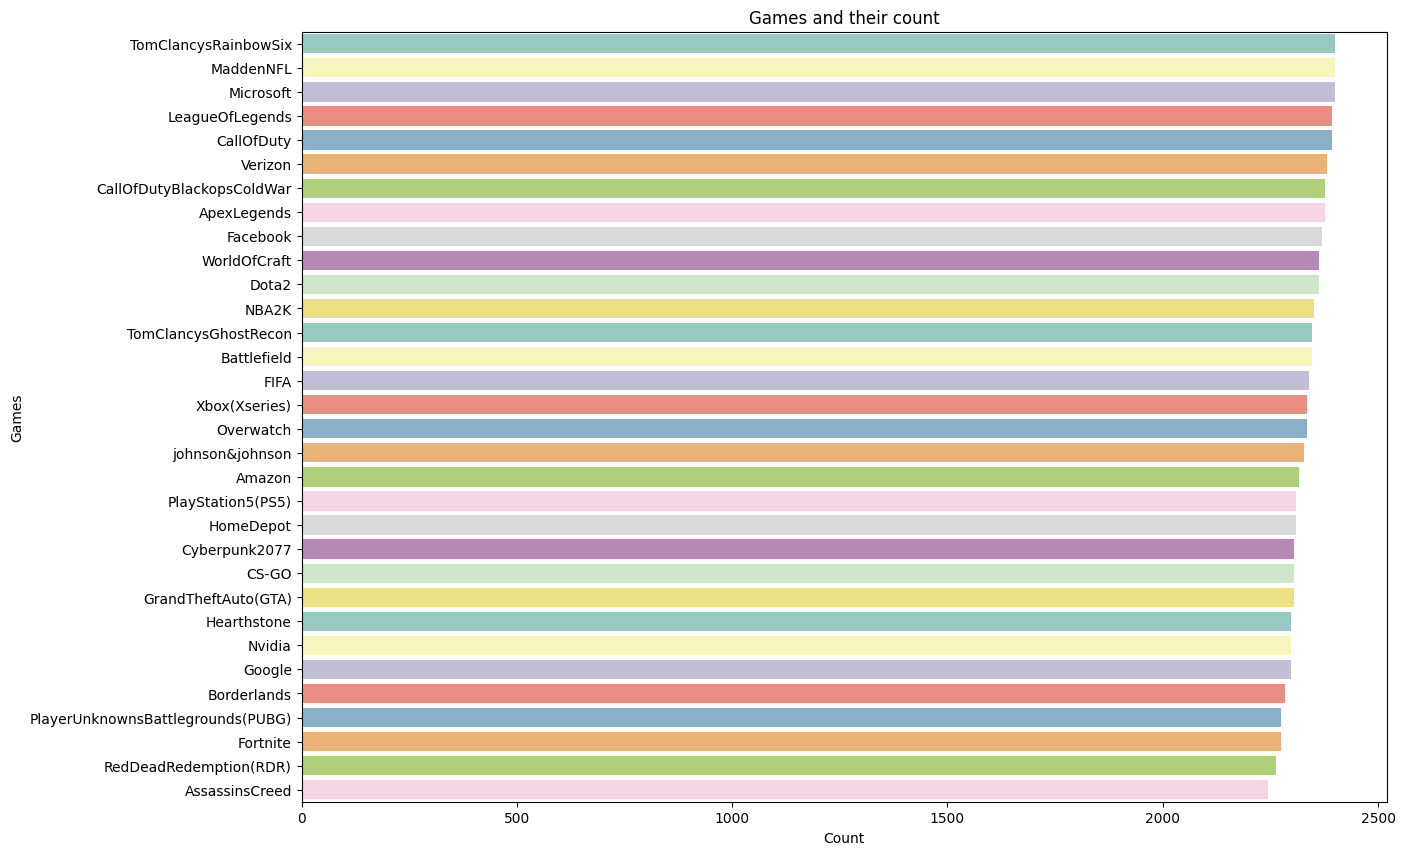

In [31]:
plt.figure(figsize=(14,10))

sns.barplot(x=game_types.values,y=game_types.index, hue = game_types.index, legend = False, palette='Set3')  
plt.title('Games and their count')
plt.ylabel('Games')
plt.xlabel('Count')

plt.show()

In [34]:
total_null=data.isnull().sum()

In [35]:
total_null

id             0
game           0
sentiment      0
text         686
dtype: int64

In [41]:
data.dropna(subset=['text'],inplace=True) #delete rows of text column whose fields are empty 

In [42]:
total_null=data.isnull().sum()

In [43]:
total_null

id           0
game         0
sentiment    0
text         0
dtype: int64

In [44]:
train0=data[data['sentiment']=="Negative"]
train1=data[data['sentiment']=="Positive"]
train2=data[data['sentiment']=="Irrelevant"]
train3=data[data['sentiment']=="Neutral"]

In [45]:
train0.shape, train1.shape, train2.shape, train3.shape

((22358, 4), (20654, 4), (12875, 4), (18108, 4))

In [47]:
train0=train0[:int(train0.shape[0]/12)]
train1=train1[:int(train1.shape[0]/12)]
train2=train2[:int(train2.shape[0]/12)]
train3=train3[:int(train3.shape[0]/12)]

#This operation will effectively reduce the number of samples in each dataset to approximately one-twelfth of their original size.

In [48]:
train0.shape, train1.shape, train2.shape, train3.shape

((1863, 4), (1721, 4), (1072, 4), (1509, 4))

In [49]:
data=pd.concat([train0,train1,train2,train3],axis=0)
data

,id,game,sentiment,text
23,2405,Borderlands,Negative,the biggest dissappoinment in my life came out...
24,2405,Borderlands,Negative,The biggest disappointment of my life came a y...
25,2405,Borderlands,Negative,The biggest disappointment of my life came a y...
26,2405,Borderlands,Negative,the biggest dissappoinment in my life coming o...
27,2405,Borderlands,Negative,For the biggest male dissappoinment in my life...
...,...,...,...,...
5603,165,Amazon,Neutral,An amazing read aloud book for you and your ch...
5604,165,Amazon,Neutral,An amazing reading book for you and your child...
5605,165,Amazon,Neutral,An amazing book to read aloud for you and your...
5606,165,Amazon,Neutral,An amazing read aloud book for you and your ch...


In [50]:
id_types = data['id'].value_counts()
id_types

id
2405    6
1810    6
1748    6
1754    6
1760    6
       ..
1602    3
1880    3
333     3
9388    2
9267    2
Name: count, Length: 1040, dtype: int64

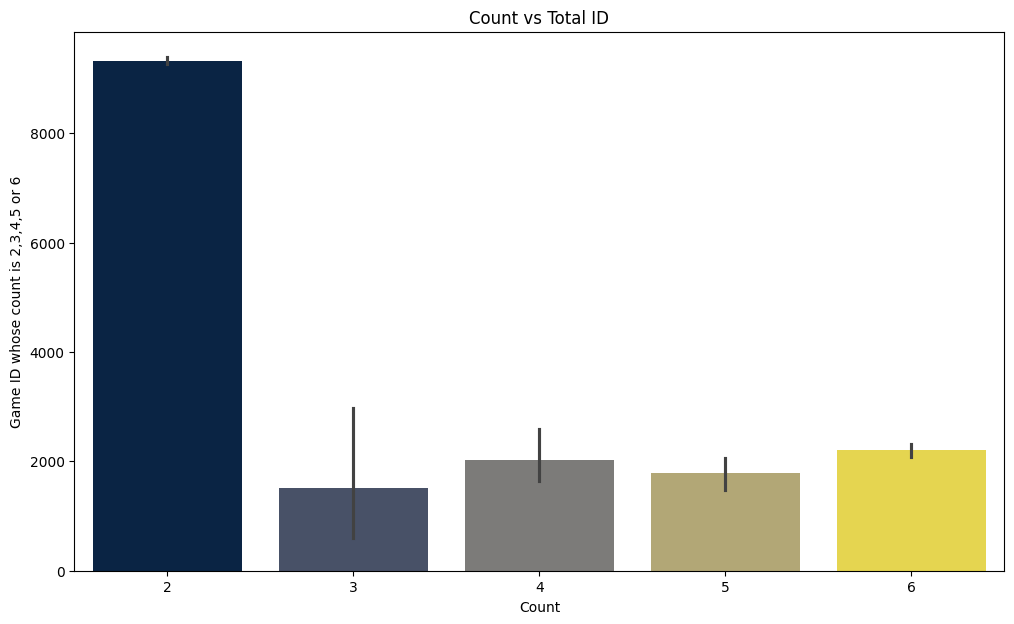

In [54]:
plt.figure(figsize=(12,7))
sns.barplot(x=id_types.values,y=id_types.index,  hue = id_types.values, legend = False, palette='cividis')

plt.xlabel('Count')
plt.ylabel('Game ID whose count is 2,3,4,5 or 6')
plt.title('Count vs Total ID')
plt.show()

In [55]:
game_types = data['game'].value_counts()
game_types

game
Borderlands                  2279
CallOfDutyBlackopsColdWar    2192
Amazon                       1321
Overwatch                     373
Name: count, dtype: int64

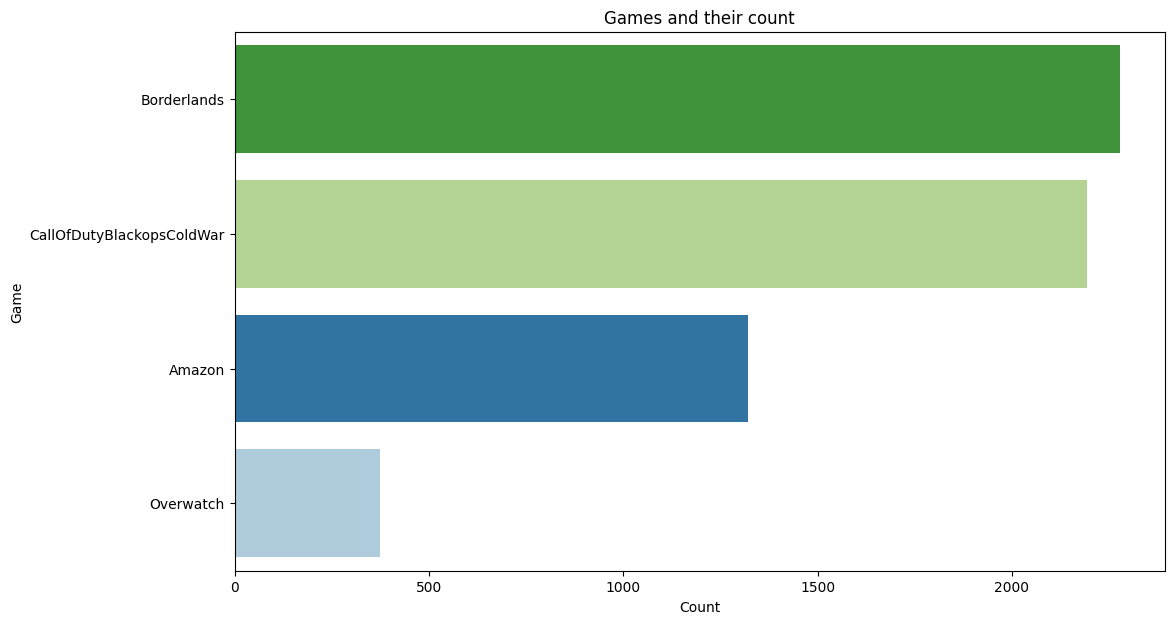

In [59]:
plt.figure(figsize=(12,7))
sns.barplot(x=game_types.values,y=game_types.index, hue = game_types.values, legend = False, palette='Paired')

plt.xlabel('Count')
plt.ylabel('Game')
plt.title('Games and their count')
plt.show()

In [60]:
sentiment_types = data['sentiment'].value_counts()
sentiment_types

sentiment
Negative      1863
Positive      1721
Neutral       1509
Irrelevant    1072
Name: count, dtype: int64

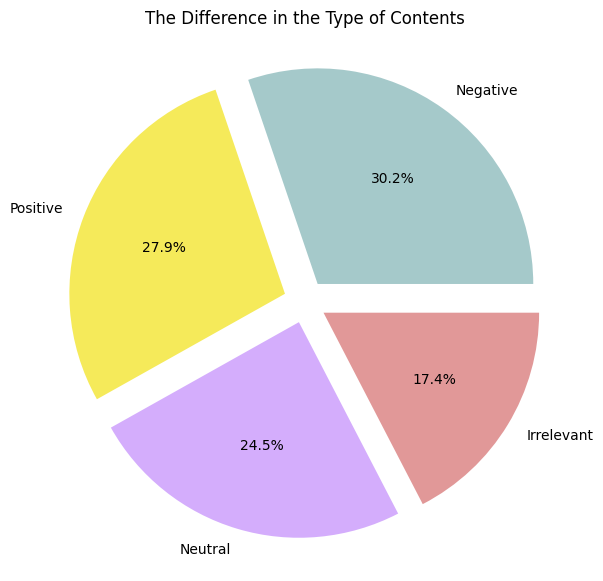

In [74]:
plt.figure(figsize=(12,7))
plt.pie(x=sentiment_types.values, labels=sentiment_types.index, autopct='%.1f%%', explode=[0.1, 0.1,0.1,0.1], colors = ["#A5C9CA", "#F5EA5A", "#D4ADFC", "#E19898"])
plt.title('The Difference in the Type of Contents')
plt.show()

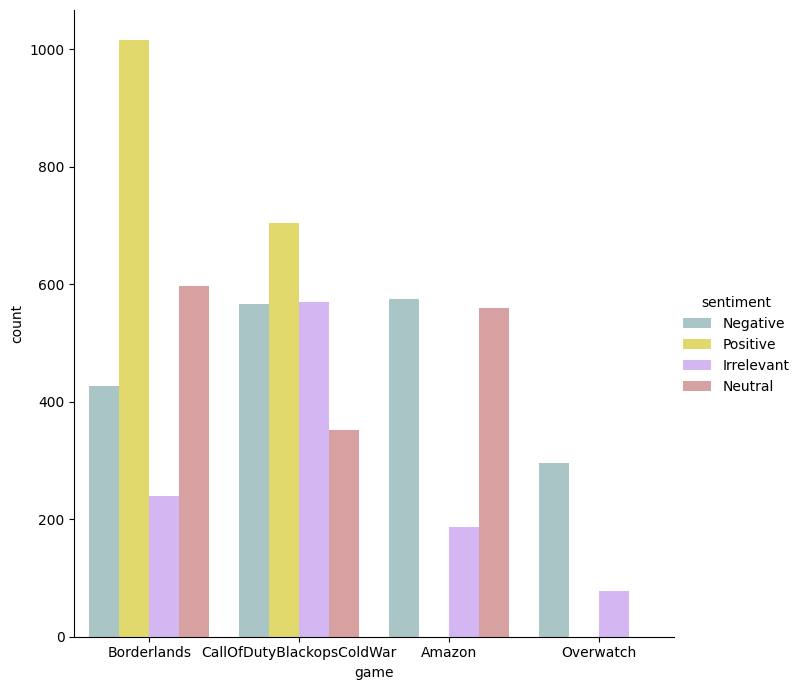

In [82]:
sns.catplot(x='game',hue='sentiment',kind='count',height=7,aspect=1,data=data, palette = ["#A5C9CA", "#F5EA5A", "#D4ADFC", "#E19898"])